<a href="https://colab.research.google.com/github/nikopj/SummerML/blob/master/Day3/Day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 3: Generalization Error

# M2: *Lab*: Multiple Linear Regression for Robot Arm Calibration

In this lab, we will illustrate the use of multiple linear regression for calibrating robot control.  

The robot data for the lab is taken from the TU Dortmund's [Multiple Link Robot Arms Project](http://www.rst.e-technik.tu-dortmund.de/cms/en/research/robotics/TUDOR_engl/index.html).  As part of the project, they have created an excellent public dataset: [MERIt](http://www.rst.e-technik.tu-dortmund.de/cms/en/research/robotics/TUDOR_engl/index.html#h3MERIt) -- A Multi-Elastic-Link Robot Identification Dataset that can be used for understanding robot dynamics.  The data is from a three link robot:

<img src="http://www.rst.e-technik.tu-dortmund.de/cms/Medienpool/redaktionelleBilder/Forschung/Schwerpunkte/TUDOR_engl/TUDORBild.png" height="200" width="200">


**We will focus on predicting the value of *current* drawn into one of the joints as a function of the robot motion.**

Load and Visualize the Data
First, import the modules we will need.

In [0]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

The full MERIt dataset can be obtained from the [MERIt site](http://www.rst.e-technik.tu-dortmund.de/cms/en/research/robotics/TUDOR_engl/index.html#h3MERIt).  But, this dataset is large. Included in this repository are two of the ten experiments.  Each experiments corresonds to 80 seconds of recorded motion.  

We are going to use the following file:
* [robot_arm.csv](https://raw.githubusercontent.com/nikopj/SummerML/master/Day3/robot_arm.csv) 

Below, we have supplied the column headers in the `names` array.  

**Use the `pd.read_csv` command to load the data.  Use the `index_col` option to specify that column 0 (the one with time) is the *index* column.**

In [0]:
names =[
    't',                                  # Time (secs)
    'q1', 'q2', 'q3',                     # Joint angle   (rads)
    'dq1', 'dq2', 'dq3',                  # Joint velocity (rads/sec)
    'I1', 'I2', 'I3',                     # Motor current (A)
    'eps21', 'eps22', 'eps31', 'eps32',   # Strain gauge measurements ($\mu$m /m )
    'ddq1', 'ddq2', 'ddq3'                # Joint accelerations (rad/sec^2)
]


# TODO 
# df = pd.read_csv(...)

Print the first six lines of the pandas dataframe.

In [0]:
# TODO

From the dataframe `df`, extract the *time* indices into a vector `t` and extract `I2`, the *current* into the second joint.  Place the *current* in a vector `y` and plot `y` vs. `t`.   Label the axes with the units.

In [0]:
# TODO
# y = ...
# t = ...
# plt.plot(...)

Let's use all the samples from the dataset that we need to train our model with:

* `y`:  A vector of all the samples from the `I2` column
* `X`:  A matrix of the data with the columns:  `['q2','dq2','eps21', 'eps22', 'eps31', 'eps32','ddq2']`

In [0]:
# TODO
# y = ...
# X = ...

#### Fit a Linear Model

Import linear_model from sklearn.

Use the `sklearn.linear_model` module to create a `LinearRegression` class `regr`.

In [0]:
# Create linear regression object
# TODO
# from ...
# regr = ...

Train the model on the our data.



In [0]:
# TODO

#regr.fit

Using the trained model, compute, `y_pred`, the predicted *current*.  Plot `y_pred` vs. time `t`.  On the same plot, plot the actual *current* `ytrain` vs. time `t`.  Create a legend for the plot.

In [0]:
# TODO
# y_pred = ...
# plt.plot ...
# plt.plot ...

#### Goodness of the fit using Mean Squared Error

In [0]:
# error = 

#M3 Demo: Fitting a Polynomial

In [0]:
import numpy as np
import matplotlib.pyplot as plt

npts = 100
x = np.random.rand(npts,1)*2*np.pi
y = 5*np.sin(x) + np.random.randn(npts,1)*1.5

plt.scatter(x,y)

In [0]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


##### Step 1: Transform the original feature into polynomial ##########
print('x before transformation\n' , x[0:5])
degree = 2
poly = PolynomialFeatures(degree)
x_poly = poly.fit_transform(x)

print('Design matrix after transformation\n' , x_poly[0:5])

In [0]:
##### Step 2: Use the new design matrix to do a Linear Regression ##########
regr = linear_model.LinearRegression()
regr.fit(x_poly,y)

## For plotting the Line
# When plottin the line, you also need to transform the line axis to polynomial as well
x_line = np.linspace(0,2*np.pi,100).reshape(-1,1)
x_line_poly = poly.fit_transform(x_line)
y_line = regr.predict(x_line_poly)

plt.plot(x_line,y_line)
plt.plot(x,y,'o')

# M4 Lab: Fit a Polynomial

- You are given the data set below with x and y values.

- Try to fit the data using a polynomial with a certain degree.

- Calculate mean square error between the sample y and your predicted y.

- Try different polynomial degree and see if you can improve the mse.

- Plot your polynomial over the data points


In [0]:
import pandas as pd
url = 'https://raw.githubusercontent.com/nikopj/SummerML/master/Day3/PolyFit_Lab_data.csv'
df = pd.read_csv(url)
x = df['x'].values.reshape(-1,1)
y = df['y'].values.reshape(-1,1)
plt.plot(x,y,'o')

In [0]:
#### TO DO ########################

# degree = ...
# model = ...

# yhat = ...
# mse = ...
# print('Polynomial degree = {}    '.format(degree), 'mse = {}'.format(mse))


## Plot your polynomial
# xline =
# yline = 
# plt.plot(xline,yline)

# M5: *Demo*: Model Order Selection
We've seen that have too complex of a model can cause it to overfit the data, and consequently fail to accurately make predictions on new measurements.
## GOAL:
Can we write an algorithm that **automatically** determines the appropriate model order and uses it?

## Generating the data
We're making synthetic data so that we can verify the accuracy of our new tool.

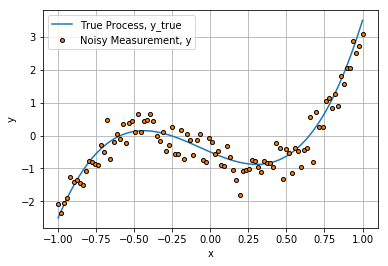

In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

nsamp = 100 # number of samples taken
p = np.array([5,1,-2,-.5]) # true process coefficients
var = 0.1 # noise variance

# we'll take a set of measurements uniformly
x = np.linspace(-1,1,nsamp)
y_true = np.polyval(p,x)
# noisy measurement, ym. use sqrt(var) as numpy normal standard deviation
y = y_true + np.random.normal(0, np.sqrt(var), nsamp)

plt.plot(x,y_true)
# we can force a scatter plot in plt.plot by making the third argument 'o'
plt.plot(x,y,'o',ms=4,markeredgecolor='black');
plt.grid();
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['True Process, y_true','Noisy Measurement, y']);

## A Reminder of how ```np.polyfit()``` works

w= [ 4.94545864  0.94744158 -2.08589257 -0.54181851]
MSE= 0.11206906447071029


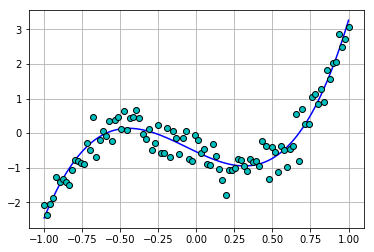

In [0]:
w = np.polyfit(x,y,3)
yhat = np.polyval(w,x)

MSE = np.mean( (y-yhat)**2 )

print('w=',w)
print('MSE=',MSE)

plt.plot(x,yhat,'-b',x,y,'oc',markeredgecolor='black')
plt.grid()

## (Optional) Make a function for computing Mean Squared Error

In [0]:
def msqerr(yhat,y):
  MSE = np.mean( (y-yhat)**2 )
  return MSE

## Model Order Selection Attempt
Rule: choose model order with lowest validation set MSE

Chosen Order =  9
Test MSE =  0.13262307322089423


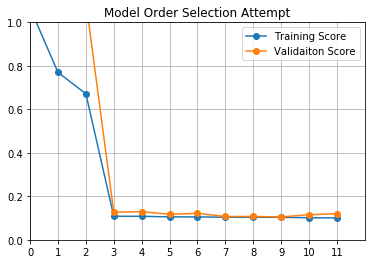

In [0]:
from sklearn.model_selection import train_test_split

# randomly shuffles data when splitting
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2 )#, random_state = 42)
xtrain, xval , ytrain, yval  = train_test_split(xtrain,ytrain, test_size=0.1 )#, random_state = 99)

M = 12
train_score = np.zeros((M,1))
val_score = np.zeros((M,1))
coeffs = []

for m in range(M):
  w = np.polyfit(xtrain, ytrain, m)
  coeffs.append(w)
  # train MSE
  yhat_train = np.polyval(w,xtrain)
  train_score[m] = msqerr(yhat_train, ytrain)
  # val MSE
  yhat_val  = np.polyval(w,xval)
  val_score[m] = msqerr(yhat_val, yval)
  
plt.plot(train_score,'o-')
plt.plot(val_score,'o-');
plt.xticks(np.arange(M))
plt.xlim(0,M)
plt.ylim(0,1)
plt.grid()
plt.legend(['Training Score','Validaiton Score'])
plt.title('Model Order Selection Attempt')

order = np.argmin(val_score)
print("Chosen Order = ",order)

yhat_test = np.polyval(coeffs[order], xtest)
MSE = msqerr(ytest, yhat_test)
print("Test MSE = ", MSE)

## K-Folds Cross-Validation:
Refer to the slide deck for the steps of the algorithm

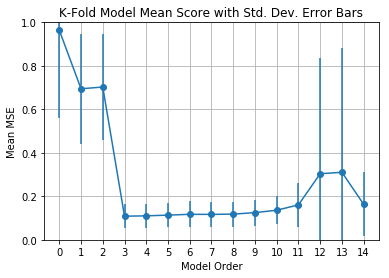

In [0]:
from sklearn.model_selection import KFold, train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2) #, random_state = 42)

M = 15
K = 10

# validation score matrix
Score = np.zeros((K,M))

kf = KFold(K)

k = 0
for train_index, val_index in kf.split(xtrain):
  xk_train, yk_train = xtrain[train_index], ytrain[train_index]
  xk_val  , yk_val   = xtrain[val_index],   ytrain[val_index]
  for m in range(M):
    w = np.polyfit(xk_train, yk_train, m)
    yhat = np.polyval(w,xk_val)
    Score[k,m] = msqerr(yhat, yk_val)
  k = k+1
  
Smean = np.mean(Score,axis=0)
Sstd  = np.std(Score,axis=0)

plt.errorbar(np.arange(M), Smean, yerr=Sstd, fmt='o-')
plt.ylim([0,1])
plt.xticks(np.arange(M))
plt.grid()
plt.xlabel('Model Order')
plt.ylabel('Mean MSE')
plt.title('K-Fold Model Mean Score with Std. Dev. Error Bars');


### K-Fold Validation Rule
We implement the one standard error rule here. Refer to lecture slides for more information

In [0]:
# computing the standard error
lowest_val_order = np.argmin(Smean)
SE = Sstd[lowest_val_order] / np.sqrt(K-1)

# finding the first model order within one standard error of the lowest mean MSE
order = 0
for i in range(M):
  if(Smean[i] < Smean[lowest_val_order] + SE):
    order = i
    break

print("Chosen Order = ", order)

# computing the test error
w = np.polyfit(xtrain, ytrain, order)
yhat = np.polyval(w,xtest)

MSE = msqerr(yhat,ytest)
print("Test MSE = ", MSE)

Chosen Order =  3
Test MSE =  0.16739153808672674


# M5: Regularization

Let's first **load** the regular packages.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load the Data

In [0]:
# Get the data
url = 'https://web.stanford.edu/~hastie/ElemStatLearn/datasets/prostate.data'
df = pd.read_csv(url, sep='\t', header=0)
df = df.drop('Unnamed: 0', axis=1)   # skip the column of indices
df.head(6)

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T
5,-1.049822,3.228826,50,-1.386294,0,-1.386294,6,0,0.765468,T


Determine the predictors and target variables

In [0]:
# Print the names of the target and predictor
names = df.columns.tolist()
names_x = names[0:7]
name_y = names[8]
print("Target variable: %s" % name_y)
print("Predictors:     "+str(names_x))

# Convert the dataframe values to data matrices
X0 = np.array(df[names_x])
y0 = np.array(df[name_y])

# Print the number of samples and features
nsamp = X0.shape[0]
nfeatures = X0.shape[1]
print("")
print("num samples = %d,  num features = %d" % (nsamp, nfeatures))

Target variable: lpsa
Predictors:     ['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason']

num samples = 97,  num features = 7


When performing any regularized estimate, it is critical to **standardize the values**.  
For this purpose, we use python's sklearn's built-in *`scale`* command.

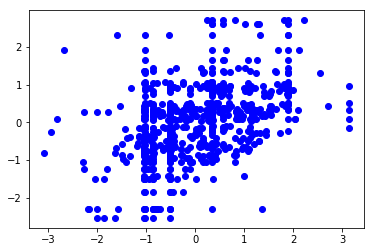

In [0]:
import sklearn.preprocessing

X = sklearn.preprocessing.scale(X0)
y = sklearn.preprocessing.scale(y0)

## Fit a Linear Model with No Regularization

Let's first try to fit a multiple linear model with no regularization.  We begin by importing the required packages - *`linear_model`* and *`train_test_split`*

In [0]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

We next split the data into training and test -- will use roughly half the samples for each.

In [0]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X,y,test_size=0.5,shuffle=True)
#test_size=0.5, uses half of the data as test data
#shuffle=True, will shuffle the data before splitting
#X_tr is the training feature matrix
#X_ts is the testing feature matrix
#y_tr is the training target matrix
#y_ts is the testing target matrix

ntr = X_tr.shape[0]
nts = X_ts.shape[0]
#.shape[0], will give us the number of rows of that array
#.shape[1], will give us the number of columns of that array

print("num samples train = %d, test = %d" % (ntr, nts))

num samples train = 48, test = 49


Fit the model on the training data.

In [0]:
regr = linear_model.LinearRegression()

regr.fit(X_tr,y_tr) #will fit the model on the X_tr,y_tr, our training data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now, we can measure the Residual Sum of Squares (RSS) on the training data.

In [0]:
# Predict the target training variables (y_tr_pred), from feature training 
# variables (X_tr)
y_tr_pred = regr.predict(X_tr)

# Measure the error
rss_tr = np.mean((y_tr_pred-y_tr)**2)
print("Training Error:", rss_tr)

Training Error: 0.32548326436801084


Measure the RSS on test data.

In [0]:
y_ts_pred = regr.predict(X_ts)

rss_ts = np.mean((y_ts_pred-y_ts)**2)
print("Test Error:", rss_ts)

Test Error: 0.3916537711357094


We can also plot the coefficients in the regression model.  Remember that all the parameters are normalized so that the coefficients can be compared.  We see that `lcavol` has the highest weight, but there are non-zero weights on all the predictors.  This makes it hard to see if other factors are significant or not. 

    lcavol    0.4561
   lweight    0.1783
       age   -0.1550
      lbph    0.1119
       svi    0.3482
       lcp   -0.0701
   gleason    0.0900


<StemContainer object of 3 artists>

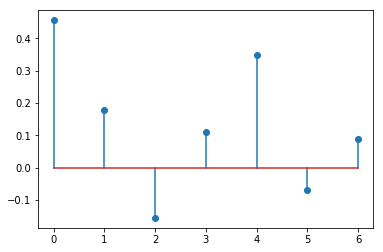

In [0]:
w = regr.coef_
for name, wi in zip(names_x, w):
    print('%10s %9.4f' % (name, wi))
    
plt.stem(w)    

## Linear Model with L2 Regularization

The above seen failure of the linear model motivates us to use regularization to try to select only the "useful" features. 

Let's discuss how we use the regularization technique.  

The `sklearn` package has several excellent routines for this. We first import the *`model_selection`* sub-package for the k-fold cross validation.

Test Error: 0.43415957890622847
    lcavol    0.3435
   lweight    0.1605
       age   -0.1094
      lbph    0.0648
       svi    0.2652
       lcp    0.0647
   gleason    0.0687


<StemContainer object of 3 artists>

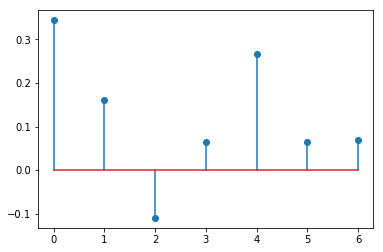

In [0]:
model = linear_model.Ridge(alpha=10)
model.fit(X_tr,y_tr)
y_ts_pred = model.predict(X_ts)

rss_ts = np.mean((y_ts_pred-y_ts)**2)
print("Test Error:", rss_ts)

w = model.coef_
for name, wi in zip(names_x, w):
    print('%10s %9.4f' % (name, wi))
    
plt.stem(w)   